In [50]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df1 = pd.read_csv('book.csv')
df1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


Text(0.5, 0, 'Is duplicated')

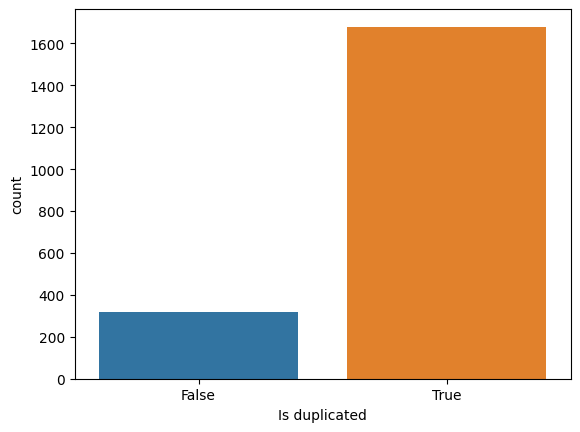

In [52]:
sns.countplot(x=df1.duplicated())
plt.xlabel('Is duplicated')

In [64]:
drop_dup_index = df1[df1.duplicated()== True].index
list_index = drop_dup_index.to_list()


In [54]:
df1.drop(list_index,inplace=True)

In [55]:
df1.shape

(320, 11)

In [56]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [57]:
frequent_itemset = apriori(df1,min_support=0.1,use_colnames=True)
frequent_itemset


,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
...,...,...
152,0.106250,"(ArtBks, DoItYBks, CookBks, GeogBks)"
153,0.106250,"(ArtBks, DoItYBks, CookBks, ItalCook)"
154,0.103125,"(RefBks, CookBks, GeogBks, ArtBks)"
155,0.112500,"(ArtBks, CookBks, GeogBks, ItalCook)"


In [58]:
length = []
for i in range(frequent_itemset.shape[0]):
  length.append(len(frequent_itemset['itemsets'][i]))


frequent_itemset['length'] = length
frequent_itemset.loc[frequent_itemset['length']>=2]

,support,itemsets,length
11,0.300000,"(YouthBks, ChildBks)",2
12,0.437500,"(ChildBks, CookBks)",2
13,0.315625,"(DoItYBks, ChildBks)",2
14,0.340625,"(RefBks, ChildBks)",2
15,0.365625,"(ArtBks, ChildBks)",2
...,...,...,...
152,0.106250,"(ArtBks, DoItYBks, CookBks, GeogBks)",4
153,0.106250,"(ArtBks, DoItYBks, CookBks, ItalCook)",4
154,0.103125,"(RefBks, CookBks, GeogBks, ArtBks)",4
155,0.112500,"(ArtBks, CookBks, GeogBks, ItalCook)",4


In [59]:
association = association_rules(frequent_itemset,metric='confidence',min_threshold=0.6)
association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
1,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
3,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
4,(RefBks),(ChildBks),0.506250,0.612500,0.340625,0.672840,1.098513,0.030547,1.184434
...,...,...,...,...,...,...,...,...,...
193,"(ArtBks, ItalArt)","(CookBks, ItalCook)",0.190625,0.334375,0.128125,0.672131,2.010112,0.064385,2.030156
194,"(ArtBks, ItalCook)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750
195,"(ItalArt, ItalCook)","(ArtBks, CookBks)",0.128125,0.384375,0.128125,1.000000,2.601626,0.078877,inf
196,"(ItalArt, CookBks)","(ArtBks, ItalCook)",0.146875,0.193750,0.128125,0.872340,4.502402,0.099668,6.315625


In [60]:
association.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
196,"(ItalArt, CookBks)","(ArtBks, ItalCook)",0.146875,0.193750,0.128125,0.872340,4.502402,0.099668,6.315625
194,"(ArtBks, ItalCook)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750
113,"(ArtBks, ItalCook)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583
191,"(ArtBks, CookBks, ItalCook)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583
115,(ItalArt),"(ArtBks, ItalCook)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
197,(ItalArt),"(ArtBks, CookBks, ItalCook)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
190,"(ArtBks, ItalArt, CookBks)",(ItalCook),0.146875,0.334375,0.128125,0.872340,2.608869,0.079014,5.214062
102,"(ItalArt, CookBks)",(ItalCook),0.146875,0.334375,0.128125,0.872340,2.608869,0.079014,5.214062
195,"(ItalArt, ItalCook)","(ArtBks, CookBks)",0.128125,0.384375,0.128125,1.000000,2.601626,0.078877,inf
58,(ItalAtlas),"(RefBks, ChildBks)",0.159375,0.340625,0.115625,0.725490,2.129879,0.061338,2.402009


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

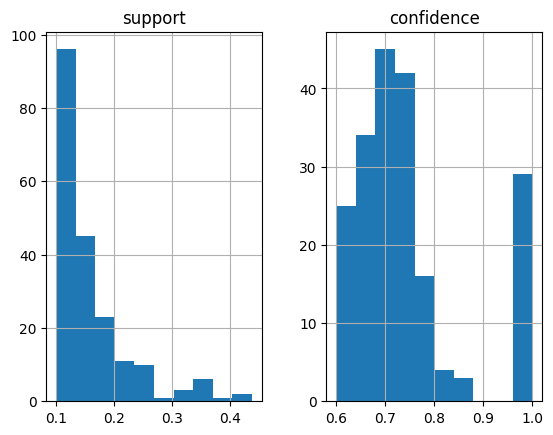

In [61]:
association[['support','confidence']].hist()

In [69]:
frequent_itemset1 = apriori(df1,min_support=0.20,use_colnames=True)
frequent_itemset1

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(YouthBks, ChildBks)"


In [70]:
association2 = association_rules(frequent_itemset1,metric='confidence',min_threshold=0.7)
association2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.612500,0.68125,0.437500,0.714286,1.048493,0.020234,1.115625
1,(ItalCook),(ChildBks),0.334375,0.61250,0.243750,0.728972,1.190158,0.038945,1.429741
2,(YouthBks),(CookBks),0.450000,0.68125,0.321875,0.715278,1.049949,0.015313,1.119512
3,(DoItYBks),(CookBks),0.490625,0.68125,0.343750,0.700637,1.028458,0.009512,1.064761
4,(ItalCook),(CookBks),0.334375,0.68125,0.334375,1.000000,1.467890,0.106582,inf
5,"(YouthBks, ChildBks)",(CookBks),0.300000,0.68125,0.221875,0.739583,1.085627,0.017500,1.224000
6,"(DoItYBks, ChildBks)",(CookBks),0.315625,0.68125,0.228125,0.722772,1.060950,0.013105,1.149777
7,"(RefBks, ChildBks)",(CookBks),0.340625,0.68125,0.246875,0.724771,1.063884,0.014824,1.158125
8,"(ArtBks, ChildBks)",(CookBks),0.365625,0.68125,0.259375,0.709402,1.041324,0.010293,1.096875
9,"(ChildBks, GeogBks)",(CookBks),0.343750,0.68125,0.240625,0.700000,1.027523,0.006445,1.062500


In [71]:
association2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(ItalCook),"(ChildBks, CookBks)",0.334375,0.43750,0.243750,0.728972,1.666222,0.097461,2.075431
4,(ItalCook),(CookBks),0.334375,0.68125,0.334375,1.000000,1.467890,0.106582,inf
10,"(ChildBks, ItalCook)",(CookBks),0.243750,0.68125,0.243750,1.000000,1.467890,0.077695,inf
1,(ItalCook),(ChildBks),0.334375,0.61250,0.243750,0.728972,1.190158,0.038945,1.429741
11,"(CookBks, ItalCook)",(ChildBks),0.334375,0.61250,0.243750,0.728972,1.190158,0.038945,1.429741
5,"(YouthBks, ChildBks)",(CookBks),0.300000,0.68125,0.221875,0.739583,1.085627,0.017500,1.224000
7,"(RefBks, ChildBks)",(CookBks),0.340625,0.68125,0.246875,0.724771,1.063884,0.014824,1.158125
6,"(DoItYBks, ChildBks)",(CookBks),0.315625,0.68125,0.228125,0.722772,1.060950,0.013105,1.149777
2,(YouthBks),(CookBks),0.450000,0.68125,0.321875,0.715278,1.049949,0.015313,1.119512
0,(ChildBks),(CookBks),0.612500,0.68125,0.437500,0.714286,1.048493,0.020234,1.115625
